# Sprint 4 Tasca M4 T01
## Exercici 1
**Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data\preu lloguer per trimestre i barri.csv')
df


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [3]:
df['Preu'] = df['Preu'].replace('--', float('NaN')).astype(float)


In [4]:
df.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

A continuación vamos a buscar si hay barrios en los que no se tenga ningún dato del precio en ningún trimestre.

In [5]:
print(df.groupby('Nom_Barri')['Preu'].apply(lambda x: x.isnull().all())[lambda x: x].index)

Index(['Can Peguera', 'Torre Baró', 'Vallbona', 'la Clota',
       'la Marina del Prat Vermell'],
      dtype='object', name='Nom_Barri')


No nos puede sorprender que sean los barrios mas deprimidos y de rentas mas bajas, visualizando la dejadez de las instituciones en estos lugares. Al no contar con ningún dato procedo a eliminarlos del estudio.

In [6]:
df_limpio = df[~df['Nom_Barri'].isin(['Can Peguera', 'Torre Baró', 'Vallbona', 'la Clota',
       'la Marina del Prat Vermell'])]

In [7]:
print(df_limpio[df_limpio['Preu'].isnull()])

      Any  Trimestre  Codi_Districte Nom_Districte  Codi_Barri      Nom_Barri  \
57   2021          1               9   Sant Andreu          58  Baró de Viver   
130  2021          1               9   Sant Andreu          58  Baró de Viver   
349  2021          3               9   Sant Andreu          58  Baró de Viver   
422  2021          3               9   Sant Andreu          58  Baró de Viver   

                                   Lloguer_mitja  Preu  
57             Lloguer mitjà mensual (Euros/mes)   NaN  
130  Lloguer mitjà per superfície (Euros/m2 mes)   NaN  
349            Lloguer mitjà mensual (Euros/mes)   NaN  
422  Lloguer mitjà per superfície (Euros/m2 mes)   NaN  


Podemos observar que existen nulls pero todos corresponden a un barri y solo al primer y tercer trimestre. Para solucionarlo, copiaré los valores del segundo y cuarto trimestre respectivamente.

In [8]:
df_limpio['Preu'] = df.groupby(['Codi_Barri', 'Lloguer_mitja'])['Preu'].transform(lambda x: x.fillna(method='bfill'))

print(df_limpio[df_limpio['Codi_Barri'] == 58])

      Any  Trimestre  Codi_Districte Nom_Districte  Codi_Barri      Nom_Barri  \
57   2021          1               9   Sant Andreu          58  Baró de Viver   
130  2021          1               9   Sant Andreu          58  Baró de Viver   
203  2021          2               9   Sant Andreu          58  Baró de Viver   
276  2021          2               9   Sant Andreu          58  Baró de Viver   
349  2021          3               9   Sant Andreu          58  Baró de Viver   
422  2021          3               9   Sant Andreu          58  Baró de Viver   
495  2021          4               9   Sant Andreu          58  Baró de Viver   
568  2021          4               9   Sant Andreu          58  Baró de Viver   

                                   Lloguer_mitja   Preu  
57             Lloguer mitjà mensual (Euros/mes)  447.5  
130  Lloguer mitjà per superfície (Euros/m2 mes)    6.7  
203            Lloguer mitjà mensual (Euros/mes)  447.5  
276  Lloguer mitjà per superfície (Eur

C:\Users\laura\AppData\Local\Temp\ipykernel_7760\4099639282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Preu'] = df.groupby(['Codi_Barri', 'Lloguer_mitja'])['Preu'].transform(lambda x: x.fillna(method='bfill'))


Para terminar convertiré la columna 'Preu' en dos columnas una con los precios mensuales y en otra los precios por m2 al mes.

In [9]:
df_pivot = df_limpio.pivot(index=['Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'],
                     columns='Lloguer_mitja',
                     values='Preu').reset_index()

df_pivot = df_pivot.rename(columns={'Lloguer mitjà mensual (Euros/mes)': 'Euros/mes', 'Lloguer mitjà per superfície (Euros/m2 mes)': 'Euros/m2 mes'})

df_pivot

Lloguer_mitja,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Euros/mes,Euros/m2 mes
0,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,1,2,Eixample,5,el Fort Pienc,918.0,12.9
...,...,...,...,...,...,...,...
267,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2
268,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8
269,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8
270,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7


In [10]:
df_pivot.describe()

Lloguer_mitja,Trimestre,Codi_Districte,Codi_Barri,Euros/mes,Euros/m2 mes
count,272.000000,272.000000,272.000000,272.000000,272.000000
mean,2.500000,6.205882,36.617647,869.097426,12.685662
std,1.120095,2.841749,21.391469,222.401300,1.746978
min,1.000000,1.000000,1.000000,447.500000,6.700000
25%,1.750000,3.750000,18.750000,741.325000,11.600000
50%,2.500000,7.000000,35.500000,815.400000,12.700000
75%,3.250000,8.250000,55.500000,934.375000,13.600000
max,4.000000,10.000000,73.000000,1816.500000,18.000000


**Crea almenys una visualització per:**

- **Una variable categòrica (Districte o Barri)**

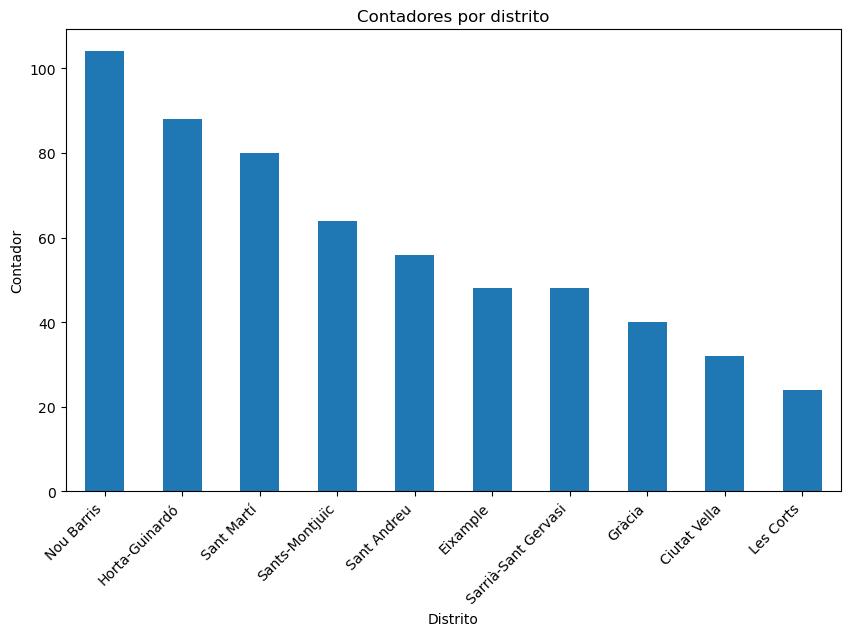

In [11]:
districte_counts = df['Nom_Districte'].value_counts()
#districte_counts = districte_counts.sort_values(by='Nom_Barri', ascending=False)
plt.figure(figsize=(10, 6))
districte_counts.plot(kind='bar')
plt.xlabel('Distrito')
plt.ylabel('Contador')
plt.title('Contadores por distrito')
plt.xticks(rotation=45, ha='right')
plt.savefig('img/barrios_por_distrito.pdf')
plt.show()

En esta gráfica lo mas reseñable sería que los distritos de la periferia tienen mas apariciones y esto es debido a que tienen más barrios, asi que incluso administrativamente vemos desigualdades.

- **Una variable numèrica (Preu)**

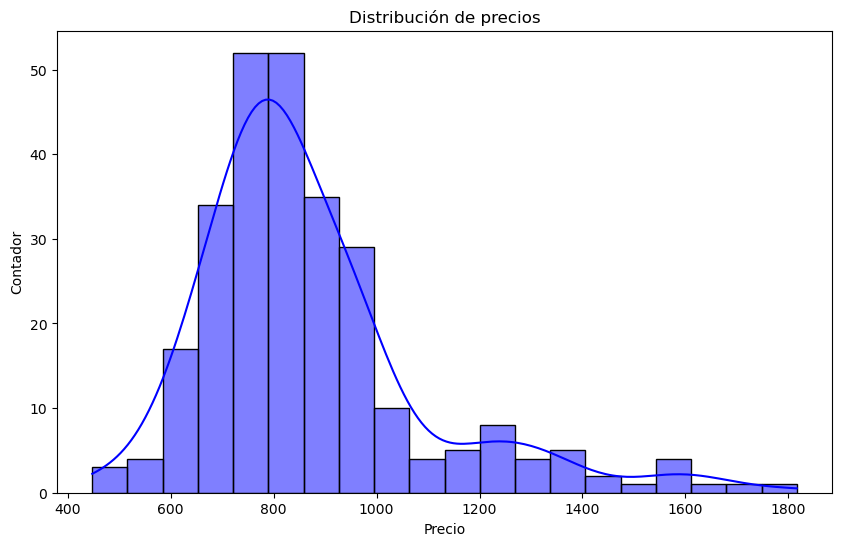

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_pivot, x='Euros/mes', bins=20, color='blue', kde=True)
plt.xlabel('Precio')
plt.ylabel('Contador')
plt.title('Distribución de precios')
plt.savefig('img/Distribución_precios.pdf')
plt.show()


Esta gráfica es muy representativa, nos muestra como se distribuye los precios de alquiler dentro de lo que a simple vista parece una distribución gaussiana, si no fuera por unos valores que se encuentran fuera de esta campana con precios del doble de la media.

- **Una variable numèrica i una categòrica (Districte i Preu)**

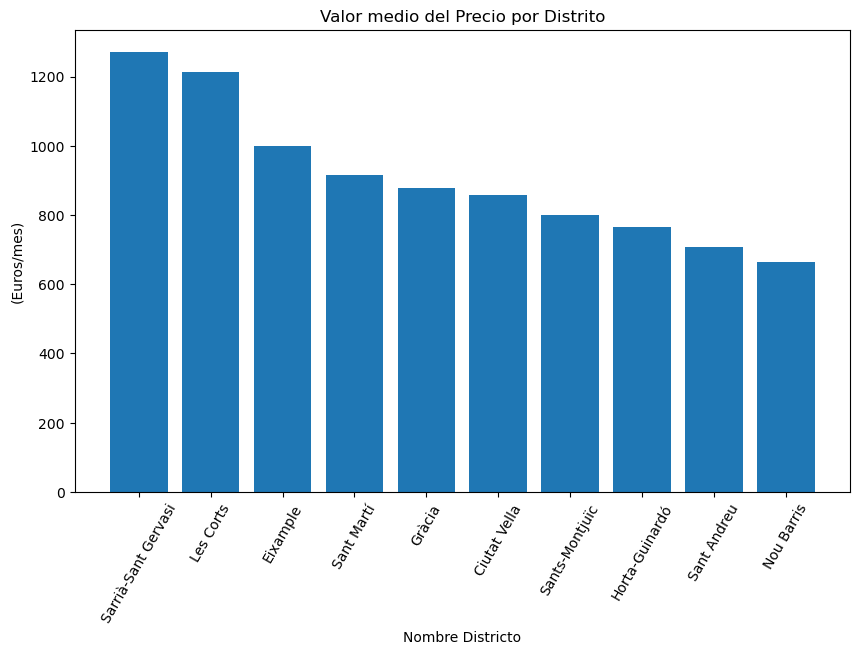

In [13]:
datos_agrupados = df_pivot.groupby('Nom_Districte')['Euros/mes'].mean().reset_index().sort_values('Euros/mes', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(datos_agrupados['Nom_Districte'], datos_agrupados['Euros/mes'])
plt.xlabel('Nombre Districto')
plt.ylabel('(Euros/mes)')
plt.title('Valor medio del Precio por Distrito')
plt.xticks(rotation=60)
plt.savefig('img/Precio_medio_distrito.pdf')
plt.show()


En esta gráfica vemos los responsables de los 'outliers' anteriores, y como esta lista es casi la inversa de la del primer gráfico.

- **Dues variables numèriques (Any o Trimestre i Preu)**

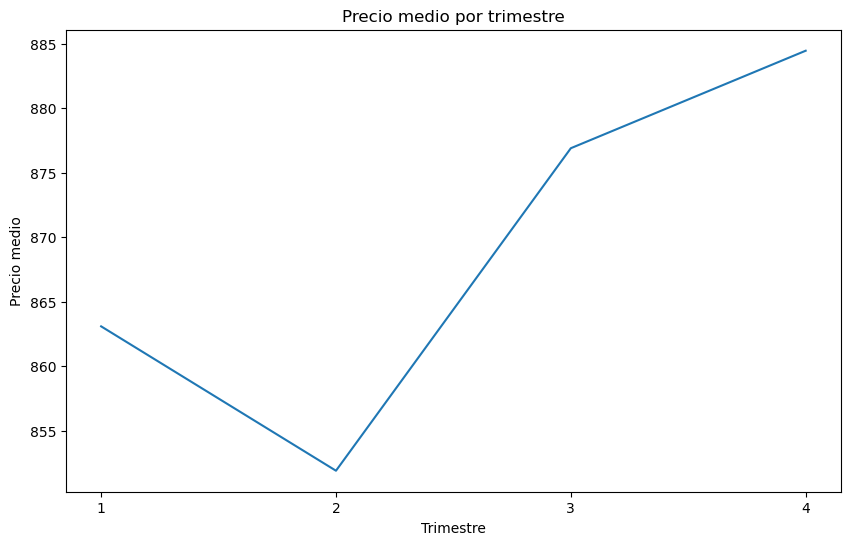

In [14]:
datos_agrupados = df_pivot.groupby('Trimestre')['Euros/mes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(datos_agrupados['Trimestre'], datos_agrupados['Euros/mes'])
plt.xlabel('Trimestre')
plt.ylabel('Precio medio')
plt.title('Precio medio por trimestre')
plt.xticks(datos_agrupados['Trimestre'])
plt.savefig('img/Precio_medio_trimestre.pdf')
plt.show()


En este gráfico vemos la tendencia al alza de los precios de los alquileres en Barcelona. Tras un leve respiro en el segundo trimestre, los precios volvieron a subir ostentosamente.

- **Tres variables (Barri o Districte, Trimestre i Preu)**

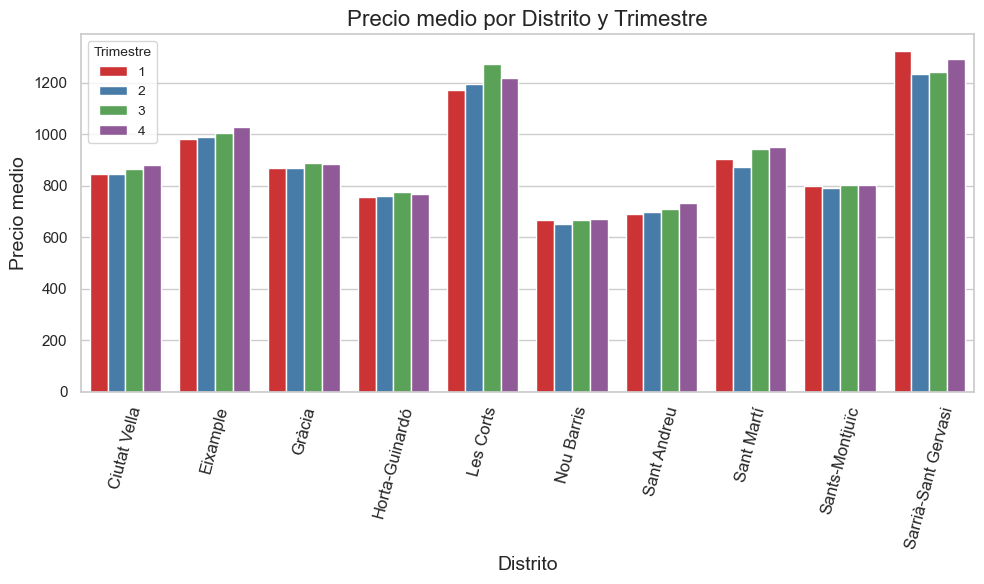

In [15]:
datos_agrupados = df_pivot.groupby(['Nom_Districte', 'Trimestre'])['Euros/mes'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x='Nom_Districte', y='Euros/mes', hue='Trimestre', data=datos_agrupados, palette="Set1")

plt.xlabel('Distrito', fontsize=14)
plt.ylabel('Precio medio', fontsize=14)
plt.title('Precio medio por Distrito y Trimestre', fontsize=16)
plt.xticks(rotation=75, fontsize=12)
plt.legend(title='Trimestre', fontsize=10, title_fontsize=10)
plt.tight_layout()

plt.savefig('img/Precio_medio_distrito_trimestre.pdf')
plt.show()


Este gráfico representa la combinación de los dos gráficos previos. En él, podemos observar las disparidades de precios entre distritos, donde en ciertos casos, los precios son casi el doble que en otros distritos. También se aprecia una tendencia general al alza en los precios de la vivienda a lo largo de los trimestres.

## Exercici 2
- **Exporta els gràfics com imatges o com HTML.**

Ya está hecho en cada uno de los gráficos justo antes de dibujarlos.

## Exercici 3
- **Proposa alguna visualització que creguis que pot resultar interessant.**

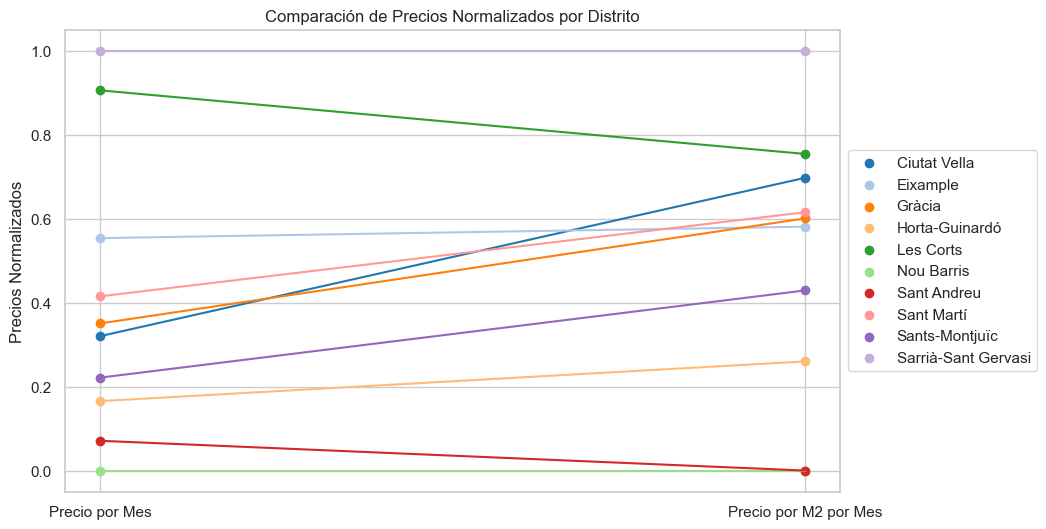

In [16]:
from sklearn.preprocessing import MinMaxScaler

df_grouped = df_pivot.groupby('Nom_Districte').agg(
    precio_mes_media=('Euros/mes', 'mean'),
    precio_m2_mes_media=('Euros/m2 mes', 'mean'),
   ).reset_index()

scaler = MinMaxScaler()
df_grouped[['precio_mes_media', 'precio_m2_mes_media']] = scaler.fit_transform(df_grouped[['precio_mes_media', 'precio_m2_mes_media']])

num_distritos = len(df_grouped)
colores_distritos = plt.cm.tab20.colors[:num_distritos]

plt.figure(figsize=(10, 6))

for i in range(len(df_grouped)):
    distrito = df_grouped['Nom_Districte'][i]
    color = colores_distritos[i]
    plt.scatter(0, df_grouped['precio_mes_media'][i], color=color, label=distrito, marker='o')
    plt.scatter(1, df_grouped['precio_m2_mes_media'][i], color=color, marker='o')
    plt.plot([0, 1], 
             [df_grouped['precio_mes_media'][i], df_grouped['precio_m2_mes_media'][i]], color=color)

plt.xticks([0, 1], ['Precio por Mes', 'Precio por M2 por Mes'])
plt.ylabel('Precios Normalizados')
plt.title('Comparación de Precios Normalizados por Distrito')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.savefig('img/Comparacion_precios_normalizados_distrito.pdf')
plt.show()

En esta gráfica, he intentado identificar diferencias significativas entre el precio mensual de la vivienda y el precio por metro cuadrado. Para lograrlo, he estandarizado ambas columnas y las he relacionado entre sí. Los resultados muestran que los distritos más caros en precio mensual también lo son en precio por metro cuadrado. Sin embargo, se observa una particularidad en el distrito de Ciutat Vella, donde el precio por metro cuadrado experimenta un aumento notable. Esto sugiere que, en ese distrito, es común encontrar viviendas más pequeñas que la media. Esto podría deberse a la subdivisión de propiedades antiguas de tamaño medio en dos pisos nuevos después de una reforma, o a la tendencia de las viviendas nuevas de ofrecer unidades más pequeñas para maximizar el rendimiento del terreno.

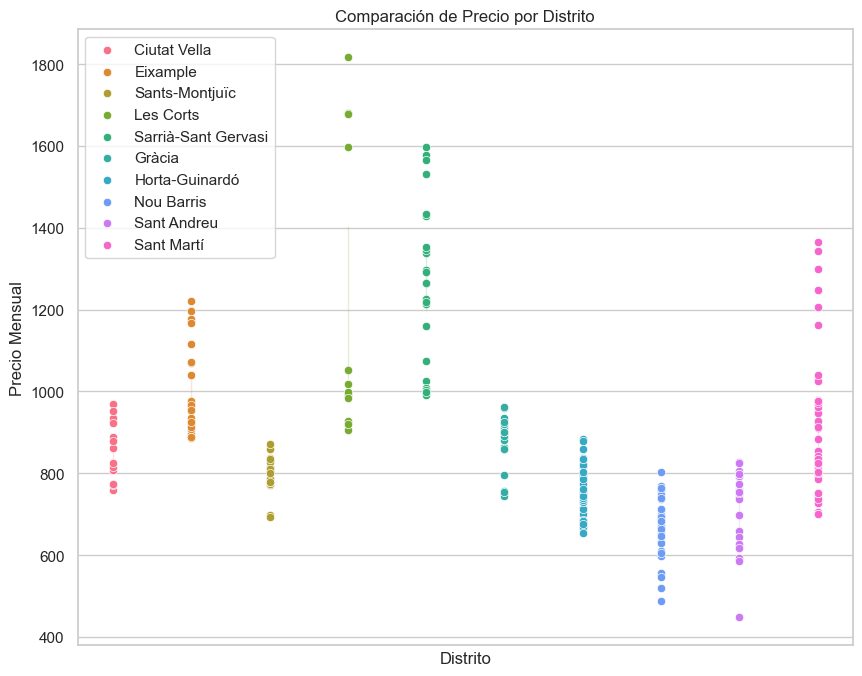

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

palette = sns.color_palette("husl", len(df_pivot['Nom_Districte'].unique()))

for i, distrito in enumerate(df_pivot['Nom_Districte'].unique()):
    data_distrito = df_pivot[df_pivot['Nom_Districte'] == distrito]
    sns.scatterplot(x=data_distrito['Nom_Districte'], y=data_distrito['Euros/mes'], color=palette[i], marker='o', label=distrito)
    sns.lineplot(x=data_distrito['Nom_Districte'], y=data_distrito['Euros/mes'], color=palette[i])

plt.xticks([])
plt.ylabel('Precio Mensual')
plt.xlabel('Distrito')
plt.title('Comparación de Precio por Distrito')
plt.legend()

plt.savefig('img/Comparacion_precio_distrito.pdf')
plt.show()

En este análisis, he buscado destacar las diferencias entre varios distritos y, al mismo tiempo, explorar las variaciones dentro de un mismo distrito. Aquí se presentan algunas de las observaciones más relevantes:

-El caso de Les Corts, encontramos que tiene precios que son cercanos a la media general. Sin embargo, este distrito contiene el área de Pedralbes, que se distingue por tener los precios más altos de toda Barcelona, lo que contribuye significativamente a la variabilidad de precios en Les Corts.

-En los distritos más humildes, como Nou Barris, se observa que las diferencias de precios entre los distintos barrios son relativamente pequeñas. Esto es curioso dado que estos distritos suelen tener una mayor cantidad de barrios, lo que podría llevar a esperar una mayor variabilidad.

-Por último, es importante resaltar el caso del distrito de Sant Martí, donde encontramos una amplia variedad de precios que abarcan todos los rangos posibles. Esto subraya la complejidad de realizar un estudio basado en distritos en lugar de barrios, ya que em algunos casos la variabilidad de precios dentro del mismo distrito puede ser significativa.

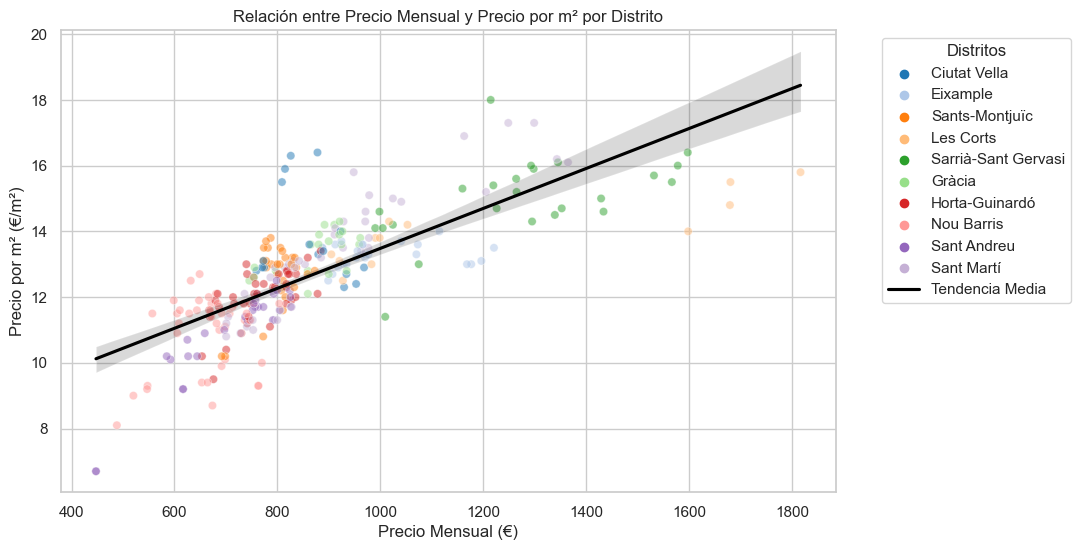

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Euros/mes', y='Euros/m2 mes', hue='Nom_Districte', data=df_pivot, palette='tab20', alpha=0.5)
sns.regplot(x='Euros/mes', y='Euros/m2 mes', data=df_pivot, scatter=False, color='black', label='Tendencia Media')

plt.xlabel('Precio Mensual (€)')
plt.ylabel('Precio por m² (€/m²)')
plt.title('Relación entre Precio Mensual y Precio por m² por Distrito')

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('img/Precio_Precio_m2_distrito.pdf')
plt.show()


Para concluir, presento este gráfico que de alguna manera sintetiza los dos gráficos anteriores. En él, podemos apreciar todas las particularidades previamente mencionadas. Por ejemplo, el caso de Ciutat Vella, que se encuentra en la gama de precios medios mensuales pero tiene un precio por metro cuadrado notablemente elevado. También es evidente la separación de datos en el distrito de Les Corts, en contraste con la proximidad de los datos en Nou Barris.

En última instancia, este gráfico es el que más destaco, ya que pone de manifiesto las diferencias sociales y económicas dentro de Barcelona, ofreciendo una visión reveladora de la segregación en esta ciudad moderna y relativamente pequeña, en la que aun quedan muros invisibles como los de aquella antigua muralla que la vio crecer.